# Portfolio on Busiest Airports
 

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [311]:
df=pd.read_csv('data/Airports.csv')

In [313]:
df.head()

,Rank,Airport,Location,Country,Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020


In [389]:
df.tail()

,Rank,Airport,Location,Country,Code,Passengers,Year
148,49,"Italy Rome–Fiumicino International Airport ""Le...","Rome-Fiumicino, Lazio",Italy,FCO/LIRF,42991056,2018
166,17,Indonesia Soekarno-Hatta International Airport,"Tangerang, Banten",Indonesia,CGK/WIII,63015620,2017
234,35,United Kingdom Gatwick Airport,"Crawley, West Sussex",United Kingdom,LGW/EGKK,43136795,2016
248,49,United States Minneapolis/St Paul Internationa...,"St. Paul, Minnesota",United States,MSP/KMSP,37413728,2016
249,50,Qatar Hamad International Airport,Doha,Qatar,DOH/OTHH,37283987,2016


In [315]:
df.shape

(250, 7)

In [317]:
df.describe()
display(df.describe())

,Rank,Passengers,Year
count,250.000000,2.500000e+02,250.000000
mean,25.500000,5.148617e+07,2018.000000
std,14.459818,2.002711e+07,1.417051
min,1.000000,1.589289e+07,2016.000000
25%,13.000000,4.189389e+07,2017.000000
50%,25.500000,4.759559e+07,2018.000000
75%,38.000000,6.449894e+07,2019.000000
max,50.000000,1.105313e+08,2020.000000


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        250 non-null    int64 
 1   Airport     250 non-null    object
 2   Location    250 non-null    object
 3   Country     250 non-null    object
 4   Code        250 non-null    object
 5   Passengers  250 non-null    int64 
 6   Year        250 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 13.8+ KB


In [321]:
df.isna().sum()

Rank          0
Airport       0
Location      0
Country       0
Code          0
Passengers    0
Year          0
dtype: int64

In [323]:
df.columns

Index(['Rank', 'Airport', 'Location', 'Country', 'Code', 'Passengers', 'Year'], dtype='object')

In [325]:
df.columns = df.columns.str.strip()

In [327]:
df['Country'].unique()

array(['China', 'United States', 'Japan', 'India', 'United Arab Emirates',
       'Turkey', 'France', 'United Kingdom', 'Mexico', 'Vietnam',
       'South Korea', 'Netherlands', 'Brazil', 'Russia', 'Germany',
       'Spain', 'Thailand', 'Hong Kong SAR, China', 'Singapore',
       'Malaysia', 'Indonesia', 'Canada', 'Taiwan', 'Philippines',
       'Australia', 'Italy', 'The Netherlands', 'Republic of Korea',
       'Qatar'], dtype=object)

In [329]:
df['Airport'].unique()

array(['China\xa0Guangzhou Baiyun International Airport',
       'United States\xa0Hartsfield–Jackson Atlanta International Airport',
       'China\xa0Chengdu Shuangliu International Airport',
       'United States\xa0Dallas/Fort Worth International Airport',
       "China\xa0Shenzhen Bao'an International Airport",
       'China\xa0Chongqing Jiangbei International Airport',
       'China\xa0Beijing Capital International Airport',
       'United States\xa0Denver International Airport',
       'China\xa0Kunming Changshui International Airport',
       'China\xa0Shanghai Hongqiao International Airport',
       "China\xa0Xi'an Xianyang International Airport",
       'Japan\xa0Tokyo Haneda Airport',
       "United States\xa0O'Hare International Airport",
       'China\xa0Shanghai Pudong International Airport',
       'United States\xa0Los Angeles International Airport',
       'India\xa0Indira Gandhi International Airport',
       'China\xa0Hangzhou Xiaoshan International Airport',
       '

In [331]:
df['Country'].value_counts()

Country
United States           76
China                   49
United Kingdom           9
Spain                    9
Germany                  9
India                    9
Japan                    9
Turkey                   6
United Arab Emirates     5
Mexico                   5
Russia                   5
Thailand                 5
France                   5
Malaysia                 4
Australia                4
Philippines              4
Taiwan                   4
Canada                   4
Indonesia                4
Hong Kong SAR, China     4
Singapore                4
South Korea              4
Netherlands              3
Italy                    3
The Netherlands          2
Republic of Korea        2
Brazil                   1
Vietnam                  1
Qatar                    1
Name: count, dtype: int64

In [333]:
df.duplicated().sum()

0

In [405]:
df.to_csv('cleaned_airports.csv', index=False)

# EDA top three countries before and after covid spike

In [385]:
df3=df[df['Country']=='China']
df3

,Rank,Airport,Location,Country,Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020
5,6,China Chongqing Jiangbei International Airport,"Yubei, Chongqing",China,CKG/ZUCK,34937789,2020
6,7,China Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,34513827,2020
8,9,China Kunming Changshui International Airport,"Guandu, Kunming, Yunnan",China,KMG/ZPPP,32989127,2020
9,10,China Shanghai Hongqiao International Airport,"Changning-Minhang, Shanghai",China,SHA/ZSSS,31165641,2020
10,11,China Xi'an Xianyang International Airport,"Weicheng, Xianyang, Shaanxi",China,XIY/ZLXY,31073884,2020
13,14,China Shanghai Pudong International Airport,"Pudong, Shanghai",China,PVG/ZSPD,30476531,2020
16,17,China Hangzhou Xiaoshan International Airport,"Xiaoshan, Hangzhou, Zhejiang",China,HGH/ZSHC,28224342,2020


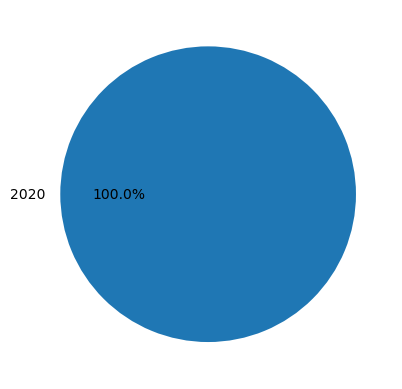

In [396]:
plt.pie(df3['Year'].value_counts(), labels=df3['Year'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [377]:
df2=df[df['Country']=='United States']
df2

,Rank,Airport,Location,Country,Code,Passengers,Year
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
7,8,United States Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,33741129,2020
12,13,United States O'Hare International Airport,"Chicago, Illinois",United States,ORD/KORD,30860251,2020
14,15,United States Los Angeles International Airport,"Los Angeles, California",United States,LAX/KLAX,28779527,2020
17,18,United States Charlotte Douglas International ...,"Charlotte, North Carolina",United States,CLT/KCLT,27200000,2020
23,24,United States Phoenix Sky Harbor International...,"Phoenix, Arizona",United States,PHX/KPHX,21928708,2020
25,26,United States Orlando International Airport,"Orlando, Florida",United States,MCO/KMCO,21617803,2020
30,31,United States Seattle–Tacoma International Air...,"SeaTac, Washington",United States,SEA/KSEA,20061507,2020
35,36,United States Miami International Airport,"Miami-Dade County, Florida",United States,MIA/KMIA,18663858,2020


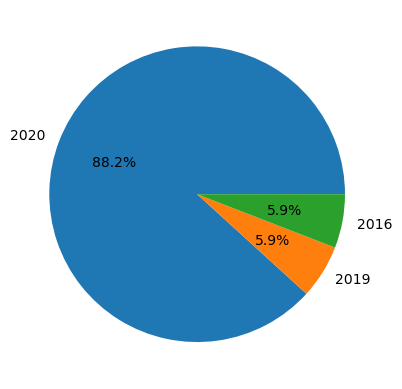

In [381]:
plt.pie(df2['Year'].value_counts(), labels=df2['Year'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [335]:
df['Airport'].unique()
df1=df[(df['Airport']=='United Kingdom\xa0Heathrow Airport')]
df1

,Rank,Airport,Location,Country,Code,Passengers,Year
21,22,United Kingdom Heathrow Airport,"Hillingdon, London",United Kingdom,LHR/EGLL,22109726,2020
56,7,United Kingdom Heathrow Airport,"Hillingdon, London",United Kingdom,LHR/EGLL,80888305,2019
106,7,United Kingdom Heathrow Airport,"Hillingdon, London",United Kingdom,LHR/EGLL,80126320,2018
155,6,United Kingdom Heathrow Airport,"Hillingdon, London",United Kingdom,LHR/EGLL,78014598,2017
206,7,United Kingdom Heathrow Airport,"Hillingdon, London",United Kingdom,LHR/EGLL,75715474,2016


In [337]:
df['Country'].unique()

array(['China', 'United States', 'Japan', 'India', 'United Arab Emirates',
       'Turkey', 'France', 'United Kingdom', 'Mexico', 'Vietnam',
       'South Korea', 'Netherlands', 'Brazil', 'Russia', 'Germany',
       'Spain', 'Thailand', 'Hong Kong SAR, China', 'Singapore',
       'Malaysia', 'Indonesia', 'Canada', 'Taiwan', 'Philippines',
       'Australia', 'Italy', 'The Netherlands', 'Republic of Korea',
       'Qatar'], dtype=object)

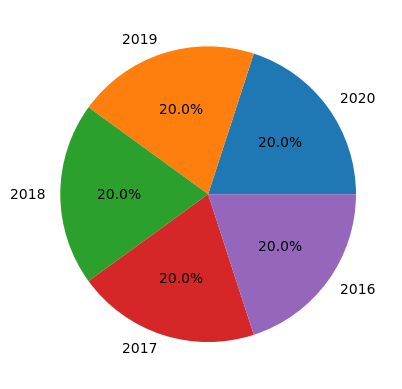

In [383]:
plt.pie(df1['Year'].value_counts(), labels=df1['Year'].value_counts().index, autopct='%1.1f%%')
plt.show()

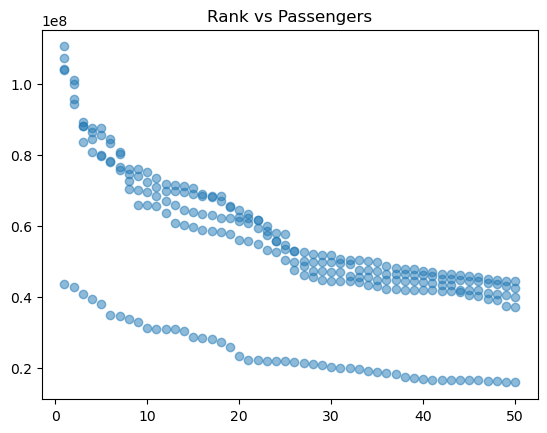

In [293]:
plt.scatter(df['Rank'], df['Passengers'], alpha=0.5)
plt.title('Rank vs Passengers')
plt.show()

## Relation between figures

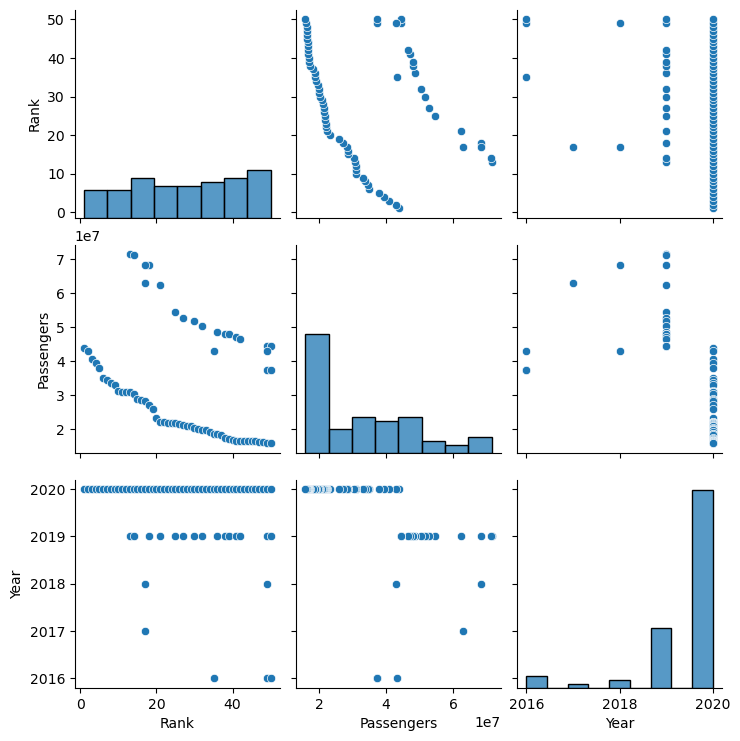

In [400]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

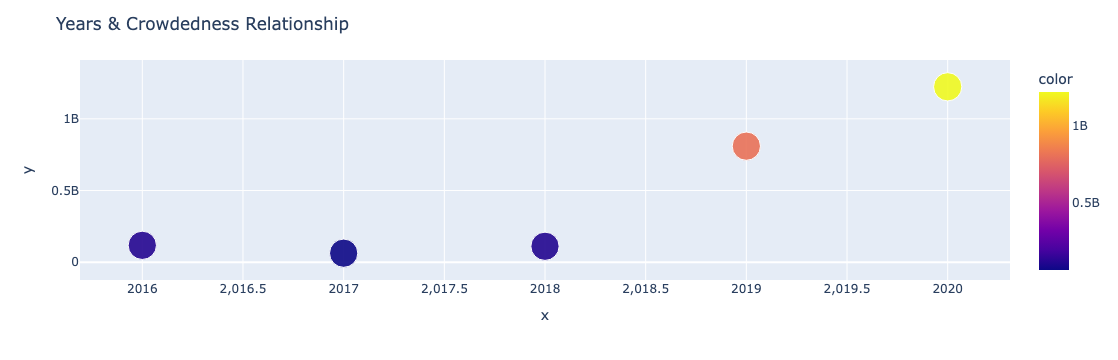

In [434]:
yp = df.groupby('Year')['Passengers'].sum()
fig = px.scatter(x =  [i for i in yp.index], y =[i for i in yp],color = [i for i in yp],size=[30,30,30,30,30],template='plotly',opacity=0.9)
fig.update_layout(title = 'Years & Crowdedness Relationship')

In [243]:
top_airports = df.sort_values(by='Passengers', ascending=False)

In [245]:
top_airports[['Rank', 'Airport', 'Country', 'Passengers']].head(10)

,Rank,Airport,Country,Passengers
50,1,United States Hartsfield–Jackson Atlanta Inter...,United States,110531300
100,1,United States Hartsfield–Jackson Atlanta Inter...,United States,107394029
200,1,United States Hartsfield–Jackson Atlanta Inter...,United States,104171935
150,1,United States Hartsfield–Jackson Atlanta Inter...,United States,103902992
101,2,China Beijing Capital International Airport,China,100983290
51,2,China Beijing Capital International Airport,China,100011438
151,2,China Beijing Capital International Airport,China,95786442
201,2,China Beijing Capital International Airport,China,94393454
102,3,United Arab Emirates Dubai International Airport,United Arab Emirates,89149387
152,3,United Arab Emirates Dubai International Airport,United Arab Emirates,88242099


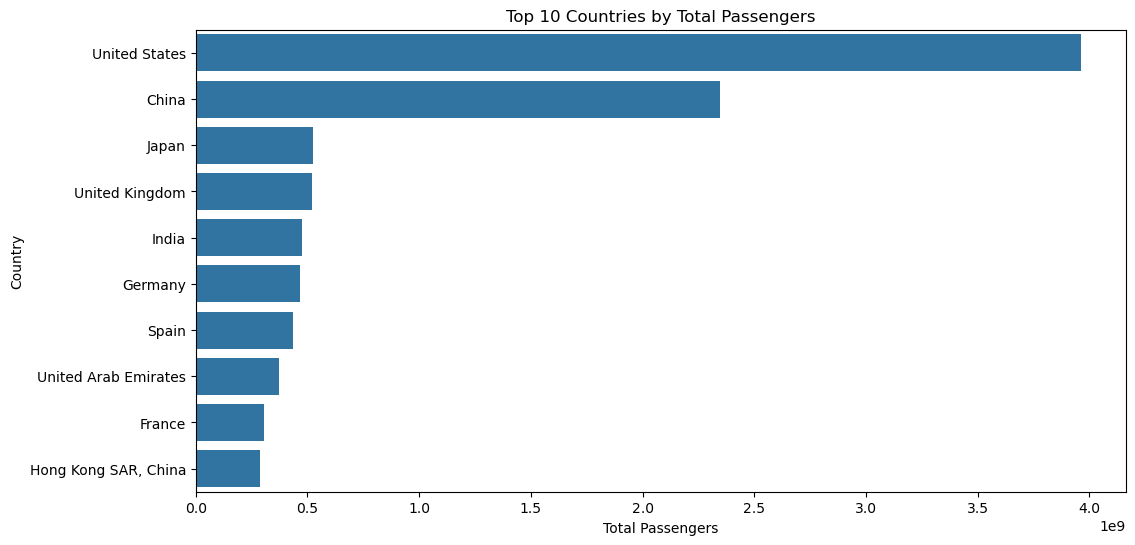

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

passengers_by_country = df.groupby('Country')['Passengers'].sum().reset_index()

top_countries = passengers_by_country.sort_values(by='Passengers', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Passengers', y='Country', data=top_countries)
plt.title('Top 10 Countries by Total Passengers')
plt.xlabel('Total Passengers')
plt.ylabel('Country')
plt.show()


In [249]:
grouped_by_country = df.groupby(['Year', 'Country'])['Passengers'].sum().reset_index()
grouped_by_country

,Year,Country,Passengers
0,2016,Australia,41985810
1,2016,Canada,44335198
2,2016,China,390582892
3,2016,France,65933145
4,2016,Germany,103048246
...,...,...,...
107,2020,Turkey,40391456
108,2020,United Arab Emirates,25900000
109,2020,United Kingdom,22109726
110,2020,United States,368767320


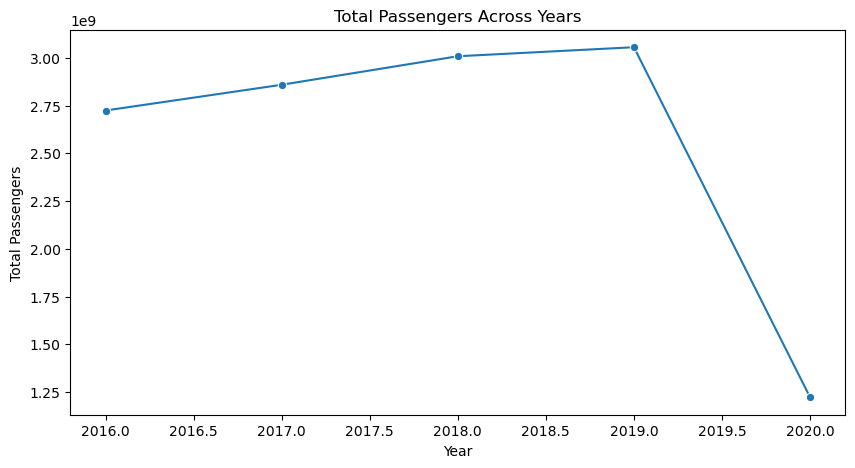

In [361]:
passengers_by_year = df.groupby('Year')['Passengers'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Passengers', data=passengers_by_year, marker='o')
plt.title('Total Passengers Across Years')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.show()


In [363]:

duplicates = df[df.duplicated(subset=['Airport', 'Code'], keep=False)]
print(duplicates)

df = df.drop_duplicates(subset=['Airport', 'Code'])


     Rank                                            Airport  \
0       1       China Guangzhou Baiyun International Airport   
1       2  United States Hartsfield–Jackson Atlanta Inter...   
2       3      China Chengdu Shuangliu International Airport   
3       4  United States Dallas/Fort Worth International ...   
4       5        China Shenzhen Bao'an International Airport   
..    ...                                                ...   
243    44           Mexico Mexico City International Airport   
244    45      China Shanghai Hongqiao International Airport   
245    46  United States Newark Liberty International Air...   
246    47     Philippines Ninoy Aquino International Airport   
247    48                 Japan Narita International Airport   

                               Location        Country      Code  Passengers  \
0    Baiyun-Huadu, Guangzhou, Guangdong          China  CAN/ZGGG    43760427   
1                      Atlanta, Georgia  United States  ATL/KATL    429

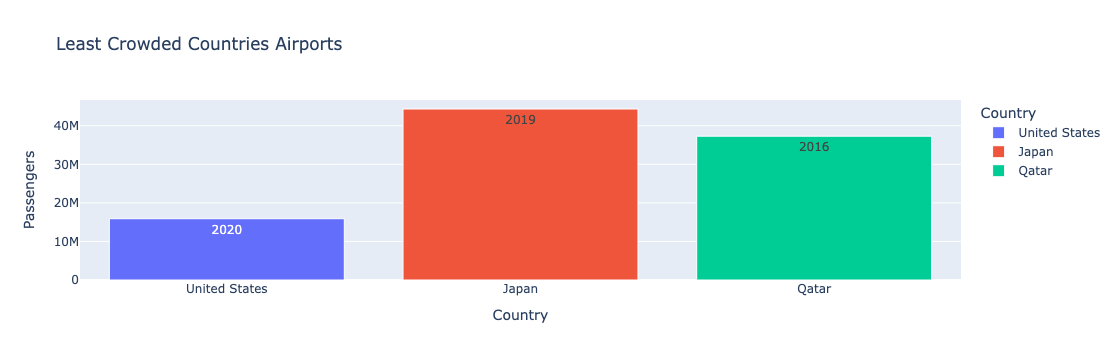

In [367]:
leastyearairports = df[df.Rank == 50]
fig = px.bar(leastyearairports,x = 'Country',y = 'Passengers',template='plotly',color ='Country',text = 'Year',title = 'Least Crowded Countries Airports' )
fig.update_traces(texttemplate = '%{text:.0f}',textposition='inside',marker_line=dict(width=1, color='#FFFFFF'))

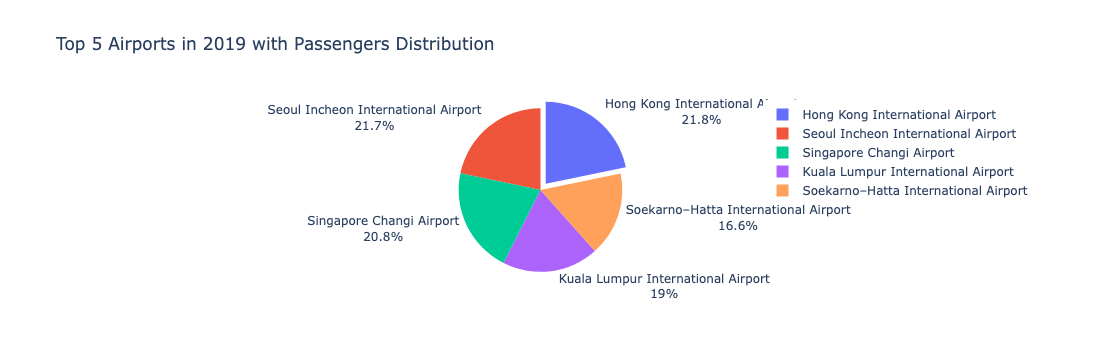

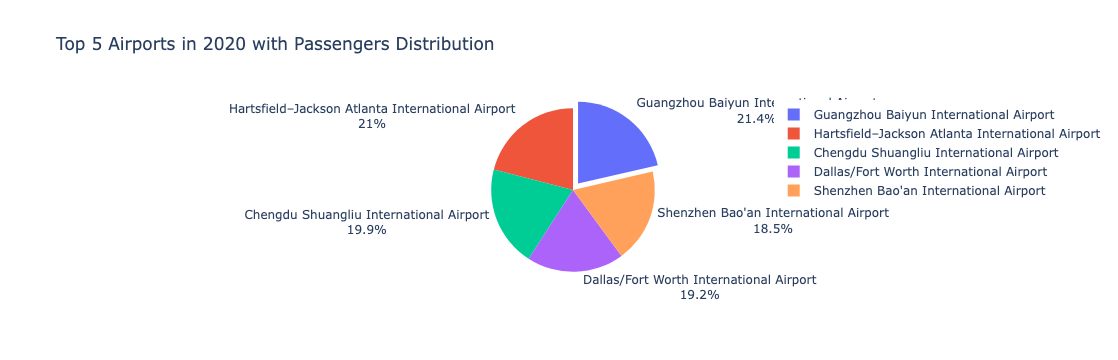

In [409]:
years = [2019,2020]
for i in years:
    year = df[df.Year == i]
    labels =[i[1] for i in  year['Airport'].head().apply(lambda x : x.split('\xa0'))]
    values = year.Passengers.head()

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                                 insidetextorientation='radial',pull=[0.1, 0, 0, 0,0])])
    fig.update_layout(title= f'Top 5 Airports in {i} with Passengers Distribution')
    fig.show()

In [373]:
mostcrowded = df.groupby('Country').sum()['Passengers'].sort_values(ascending=False)[:10]

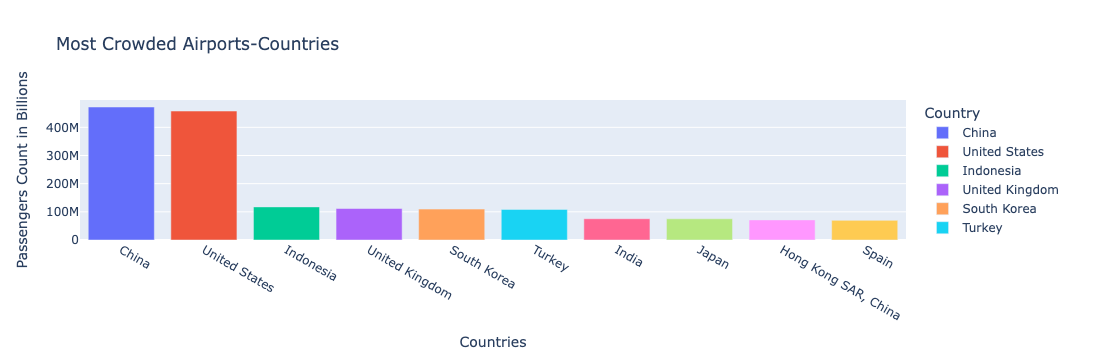

In [375]:
fig = px.bar(mostcrowded,x = mostcrowded.index,y = mostcrowded,color = mostcrowded.index,template='plotly',title = 'Most Crowded Airports-Countries')
fig.update_layout(xaxis_title = 'Countries',yaxis_title = 'Passengers Count in Billions')

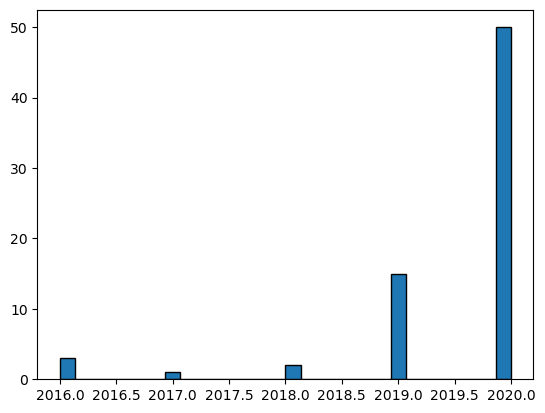

In [418]:
plt.hist(df['Year'], bins=30, edgecolor='black')
plt.show()